ARTIFICIAL INTELLIGENCE A.Y 2024 MINI PROJECT

Name: Hiren Mwanje, Maddara
Student ID: 2106657
Start Date: 01 Jan, 2025

In [ ]:
# 1. import libs and data processing

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.neural_network import MLPClassifier
from tensorflow import keras

# Load MNIST dataset
from torchvision.datasets import MNIST

mnist_tr = MNIST(root="../mnist", train=True, download=True)
mnist_te = MNIST(root="../mnist", train=False, download=True)

# Data preprocessing
x_tr = mnist_tr.data.numpy().reshape(60000, 28 * 28) / 255
x_te = mnist_te.data.numpy().reshape(10000, 28 * 28) / 255

mnist_tr_labels = mnist_tr.targets.numpy()
mnist_te_labels = mnist_te.targets.numpy()

# CNN-specific preprocessing
x_tr_conv = x_tr.reshape(-1, 28, 28, 1)
x_te_conv = x_te.reshape(-1, 28, 28, 1)


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 16.1MB/s]


Extracting ../mnist/MNIST/raw/train-images-idx3-ubyte.gz to ../mnist/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 485kB/s]


Extracting ../mnist/MNIST/raw/train-labels-idx1-ubyte.gz to ../mnist/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 3.84MB/s]


Extracting ../mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to ../mnist/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 7.79MB/s]


Extracting ../mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../mnist/MNIST/raw



In [11]:
# 2. Train MLP and CNN on clean data

# MLP Classifier
MLP = MLPClassifier(hidden_layer_sizes=(500, 500), max_iter=10, random_state=42)
MLP.fit(x_tr, mnist_tr_labels)

# CNN Model
cnn_model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(units=10, activation='softmax')
])
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_model.fit(x_tr_conv, mnist_tr_labels, epochs=5)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9072 - loss: 0.3274
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - accuracy: 0.9792 - loss: 0.0707
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9847 - loss: 0.0508
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9902 - loss: 0.0346
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9929 - loss: 0.0251


In [15]:
# 2.b performance on clead data

# Evaluate models on noisy test data
mlp_clean_accuracy = MLP.score(x_te, mnist_te_labels)
cnn_accuracy = cnn_model.evaluate(x_te_conv, mnist_te_labels, verbose=0)[1]

print(f"MLP Accuracy on Clean Data: {mlp_clean_accuracy:.2f}")
print(f"CNN Accuracy on Clean Data: {cnn_accuracy:.2f}")

MLP Accuracy on Clean Data: 0.98
CNN Accuracy on Clean Data: 0.98


From the results obtained above, the two models (MLP and CNN) score equal accuracies


In [16]:
# 3.Add fixed noise to test data

def add_noise(data, std_dev):
    noise = np.random.normal(0, std_dev, data.shape)
    noisy_data = np.clip(data + noise, 0, 1)  # Ensure pixel values remain in [0, 1]
    return noisy_data

# Add noise with standard deviation of 0.5
x_te_noisy = add_noise(x_te, 0.5)
x_te_noisy_conv = x_te_noisy.reshape(-1, 28, 28, 1)

# Evaluate models on noisy test data
mlp_accuracy = MLP.score(x_te_noisy, mnist_te_labels)
cnn_accuracy = cnn_model.evaluate(x_te_noisy_conv, mnist_te_labels, verbose=0)[1]

print(f"MLP Accuracy on Noisy Data: {mlp_accuracy:.2f}")
print(f"CNN Accuracy on Noisy Data: {cnn_accuracy:.2f}")


MLP Accuracy on Noisy Data: 0.49
CNN Accuracy on Noisy Data: 0.51


the MLP (0.49) performs worse than the CNN (0.51)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


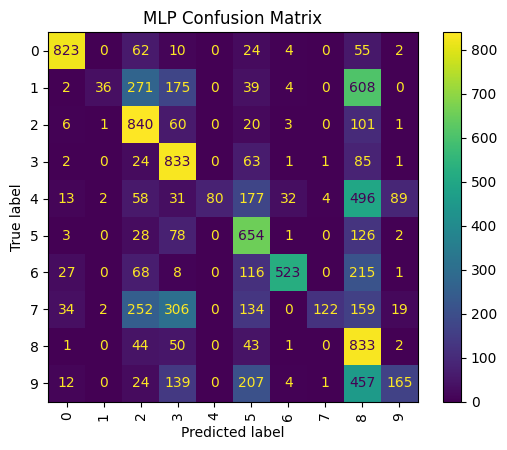

---------


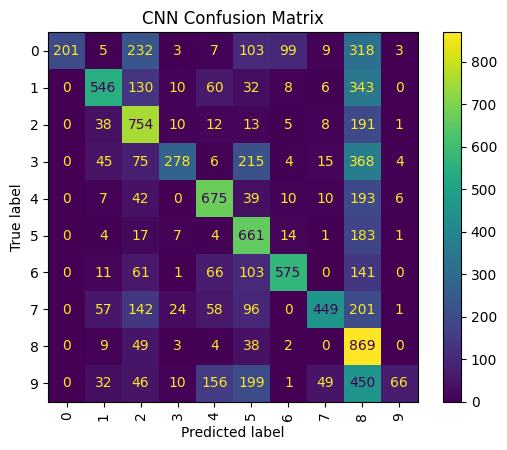

Most challenging digit for MLP: 1


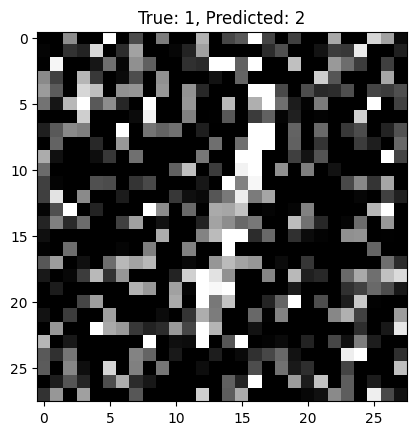

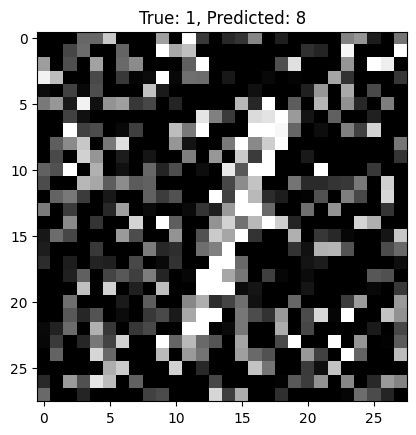

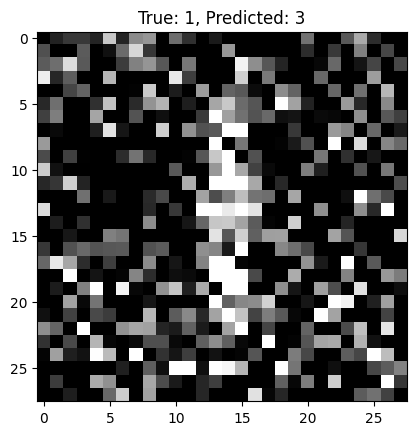

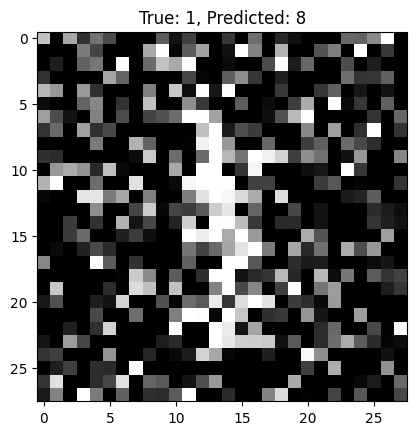

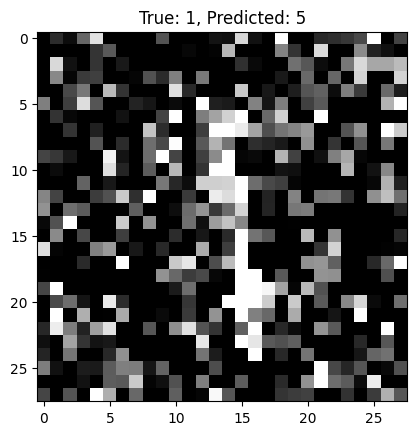

Most challenging digit for CNN: 9


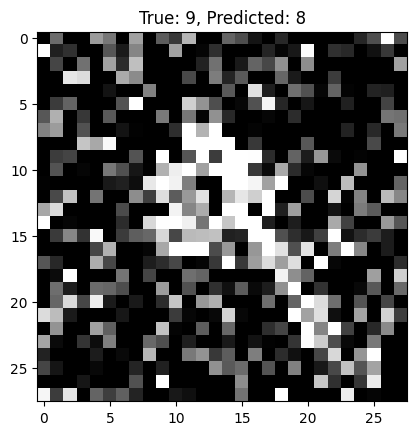

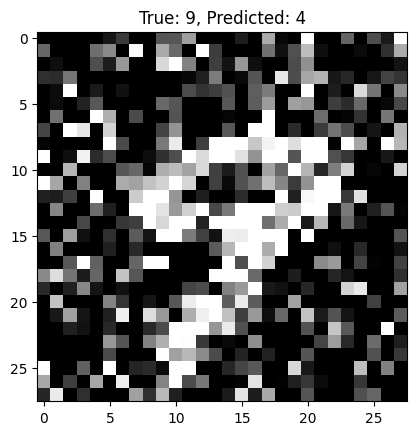

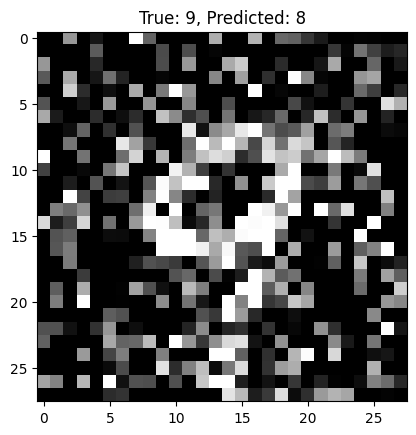

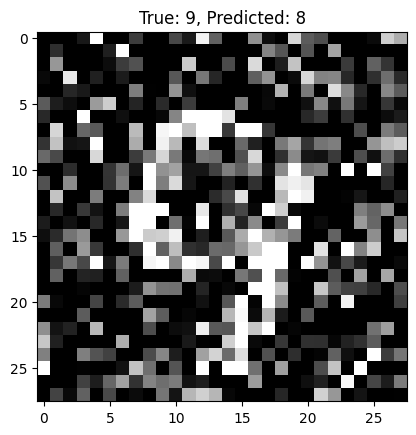

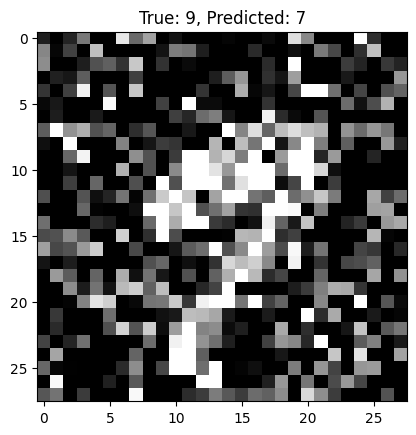

In [20]:
# 4. Find challenging digits
from sklearn.metrics import confusion_matrix

# Predictions and confusion matrices
mlp_predictions = MLP.predict(x_te_noisy)
cnn_predictions = cnn_model.predict(x_te_noisy_conv).argmax(axis=1)

mlp_cm = confusion_matrix(mnist_te_labels, mlp_predictions)
cnn_cm = confusion_matrix(mnist_te_labels, cnn_predictions)

# Display confusion matrices
ConfusionMatrixDisplay(mlp_cm, display_labels=range(10)).plot(cmap="viridis", xticks_rotation='vertical')
plt.title("MLP Confusion Matrix")
plt.show()
print("---------")

ConfusionMatrixDisplay(cnn_cm, display_labels=range(10)).plot(cmap="viridis", xticks_rotation='vertical')
plt.title("CNN Confusion Matrix")
plt.show()

# Visualize misclassified examples
challenging_digit = np.argmax(mlp_cm.sum(axis=1) - np.diag(mlp_cm))
print(f"Most challenging digit for MLP: {challenging_digit}")

misclassified_idx = np.where((mnist_te_labels == challenging_digit) & (mlp_predictions != challenging_digit))[0]

for i in misclassified_idx[:5]:  # Show first 5 misclassified examples
    plt.imshow(x_te_noisy[i].reshape(28, 28), cmap="gray")
    plt.title(f"True: {mnist_te_labels[i]}, Predicted: {mlp_predictions[i]}")
    plt.show()


# misclassified examples for the cnn
challenging_digit = np.argmax(cnn_cm.sum(axis=1) - np.diag(cnn_cm))
print(f"Most challenging digit for CNN: {challenging_digit}")

misclassified_idx_cnn = np.where((mnist_te_labels == challenging_digit) & (cnn_predictions != challenging_digit))[0]
for i in misclassified_idx_cnn[:5]:  # Show first 5 misclassified examples
    plt.imshow(x_te_noisy[i].reshape(28, 28), cmap="gray")
    plt.title(f"True: {mnist_te_labels[i]}, Predicted: {cnn_predictions[i]}")
    plt.show()

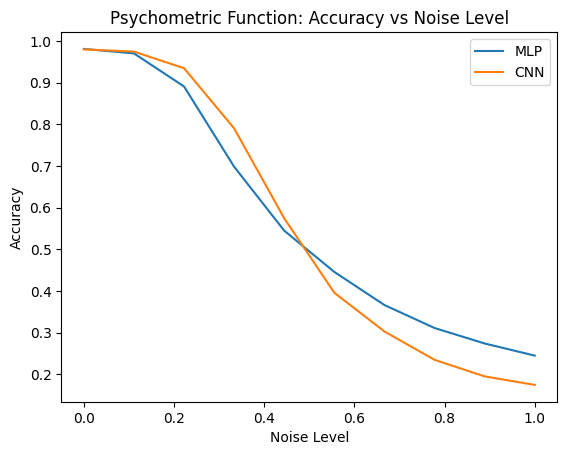

In [ ]:
# 5. Pyschometric function

noise_levels = np.linspace(0, 1, 10)  # Noise levels from 0 to 1
mlp_accuracies = []
cnn_accuracies = []

for noise in noise_levels:
    noisy_test_data = add_noise(x_te, noise)
    noisy_test_data_conv = noisy_test_data.reshape(-1, 28, 28, 1)

    mlp_accuracies.append(MLP.score(noisy_test_data, mnist_te_labels))
    cnn_accuracies.append(cnn_model.evaluate(noisy_test_data_conv, mnist_te_labels, verbose=0)[1])

plt.plot(noise_levels, mlp_accuracies, label="MLP")
plt.plot(noise_levels, cnn_accuracies, label="CNN")
plt.xlabel("Noise Level")
plt.ylabel("Accuracy")
plt.title("Psychometric Function: Accuracy vs Noise Level")
plt.legend()
plt.show()

# fron the graph i think the cnn is more sensitive to noise in the input, basing on the gradient of its psychometric function plot


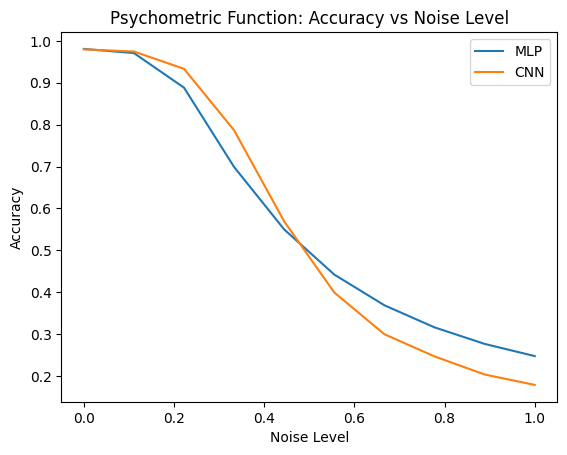

In [ ]:
# 6. Add noise to training data

noise_levels = np.linspace(0, 1, 10)  # Noise levels from 0 to 1
mlp_accuracies = []
cnn_accuracies = []

for noise in noise_levels:
    noisy_test_data = add_noise(x_te, noise)
    noisy_test_data_conv = noisy_test_data.reshape(-1, 28, 28, 1)

    mlp_accuracies.append(MLP.score(noisy_test_data, mnist_te_labels))
    cnn_accuracies.append(cnn_model.evaluate(noisy_test_data_conv, mnist_te_labels, verbose=0)[1])

plt.plot(noise_levels, mlp_accuracies, label="MLP")
plt.plot(noise_levels, cnn_accuracies, label="CNN")
plt.xlabel("Noise Level")
plt.ylabel("Accuracy")
plt.title("Psychometric Function: Accuracy vs Noise Level")
plt.legend()
plt.show()
